In [1]:
from IPython.display import Image
%matplotlib inline

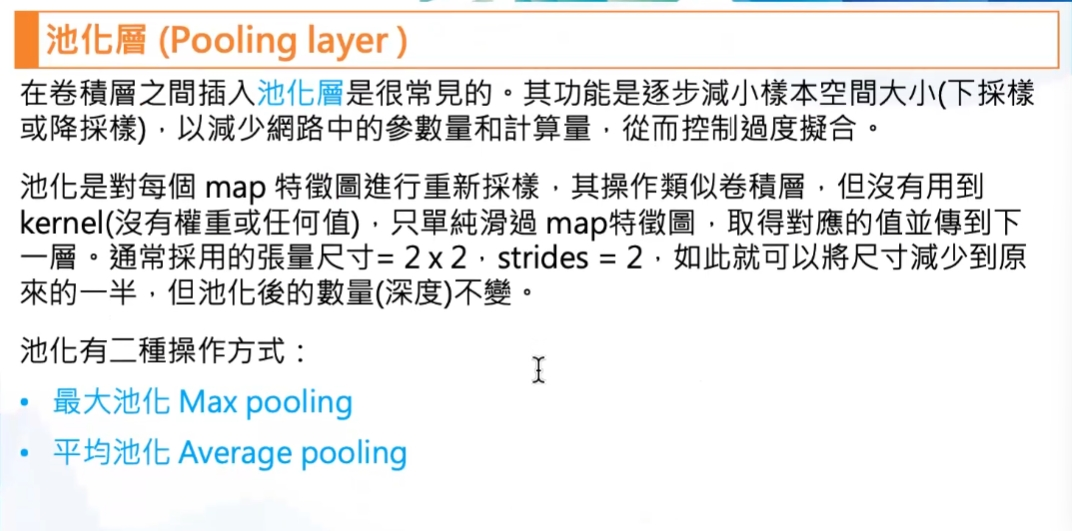

In [2]:
Image(filename='img/pl0.png', width=1000)

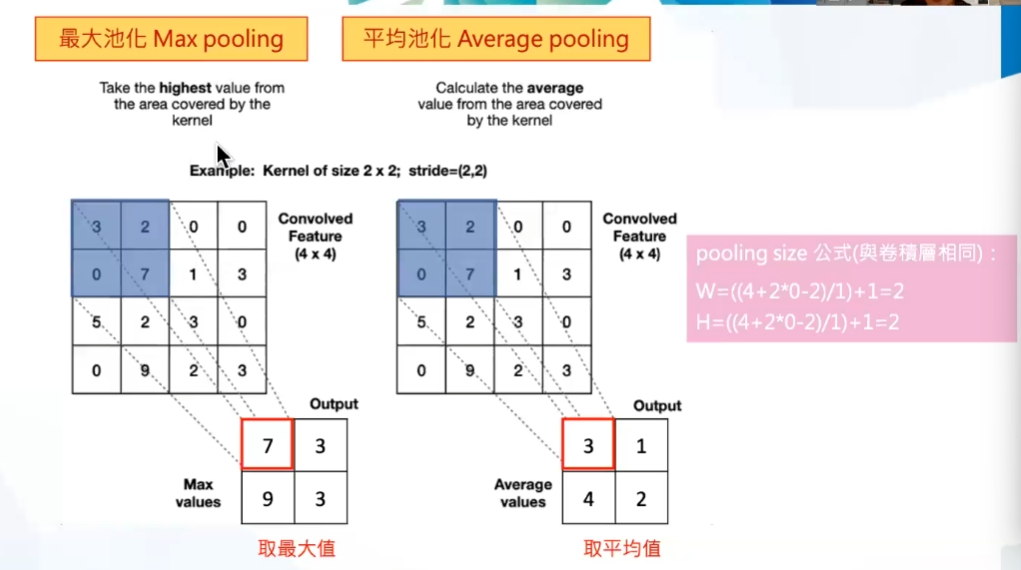

In [3]:
Image(filename='img/pl1.png', width=1000)

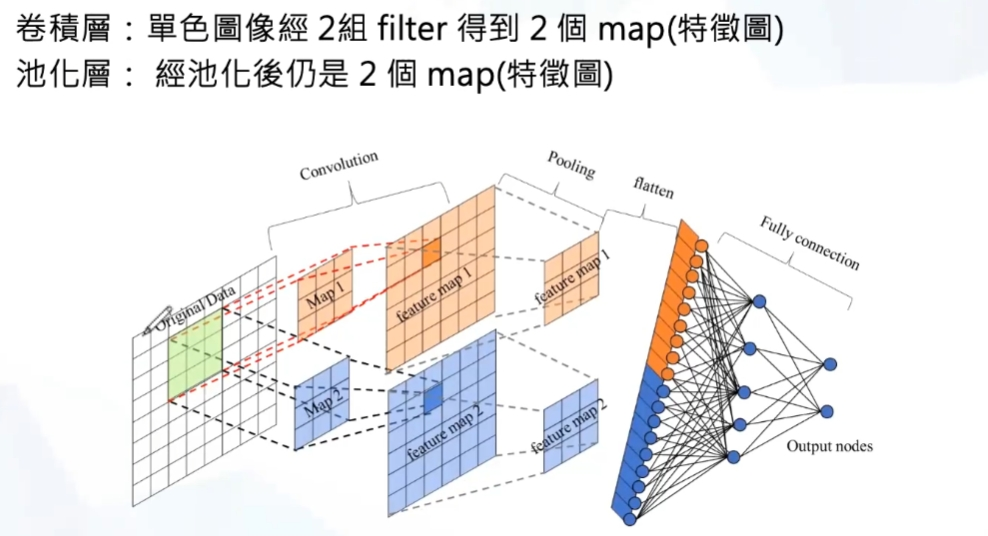

In [4]:
Image(filename='img/pl2.png', width=1000)

params counts between without pooling and with pooling


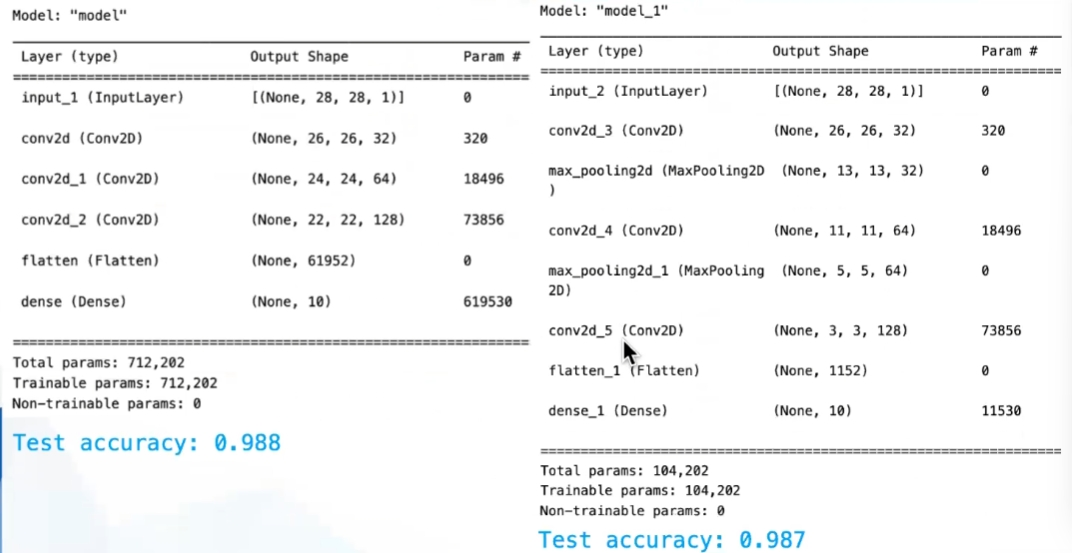

In [7]:
print("params counts between without pooling and with pooling")
Image(filename='img/pl3.png', width=1000)

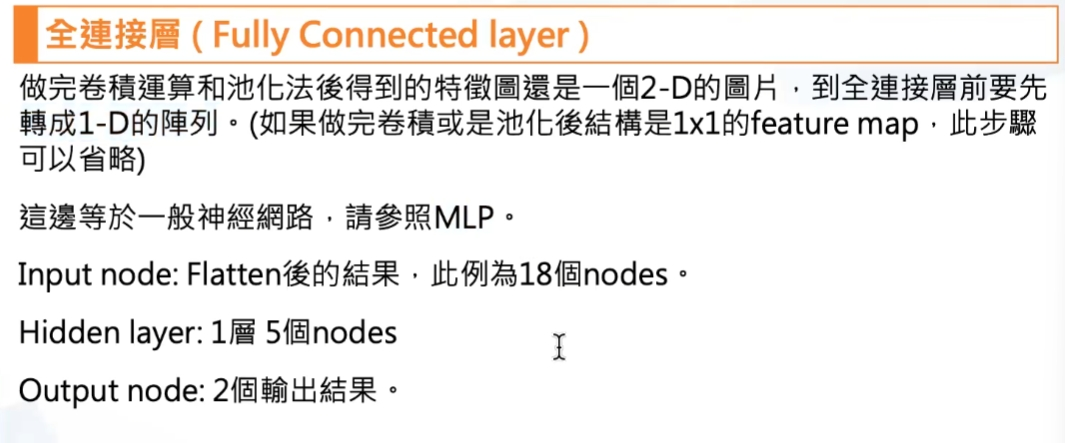

In [16]:
Image(filename='img/pl4.png', width=1000)

# 1. without pooling

### 初始化一個小型卷積神經網路(convnet) /
### 語法參考0_5.keras語法(函數式) / 2_0.ipynb

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.72

### 用MNIST影像訓練卷積神經網路

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 118s 123ms/step - loss: 0.1195 - accuracy: 0.9638
Epoch 2/5
938/938 [==============================] - 119s 127ms/step - loss: 0.0425 - accuracy: 0.9872
Epoch 3/5
938/938 [==============================] - 125s 133ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 117s 125ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 5/5
938/938 [==============================] - 122s 130ms/step - loss: 0.0158 - accuracy: 0.9953


### Evaluate

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 4s 13ms/step - loss: 0.0405 - accuracy: 0.9901
Test accuracy: 0.990


# 2. with pooling

In [12]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [14]:
model.compile(optimizer="rmsprop",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 24s 25ms/step - loss: 0.1600 - accuracy: 0.9510
Epoch 2/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0434 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0304 - accuracy: 0.9905
Epoch 4/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0173 - accuracy: 0.9948


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9910
Test accuracy: 0.991
